[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ncerdan/HandsOnML/blob/master/Ch_09_Unsupervised_Learning.ipynb)

# Clustering

## K-Means

In [1]:
# make out dataset
from sklearn.datasets import make_blobs
import numpy as np

blob_centers = np.array([
    [ 0.2,  2.3],
    [-1.5 ,  2.3],
    [-2.8,  1.8],
    [-2.8,  2.8],
    [-2.8,  1.3]                     
])

blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std)

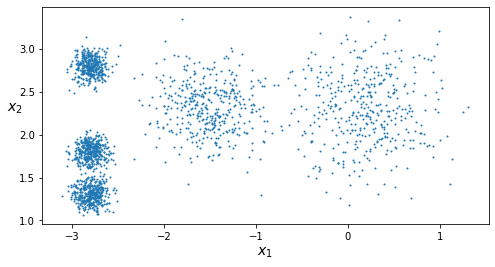

In [2]:
# now lets plot them
import matplotlib.pyplot as plt

def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

In [3]:
# now let's train on the clusters
from sklearn.cluster import KMeans
k = 5
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)


In [4]:
# KMeans instance saves the label of each instance it was trained on
print(kmeans.labels_)
print(y_pred)

[1 0 1 ... 3 3 0]
[1 0 1 ... 3 3 0]


In [5]:
# it also stores the centroids
kmeans.cluster_centers_

array([[ 0.19422877,  2.29384999],
       [-2.79728177,  1.80416956],
       [-1.50588959,  2.30756599],
       [-2.79575793,  2.79259384],
       [-2.79802679,  1.30359601]])

In [6]:
# now you can easily predict new data
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([0, 0, 3, 3], dtype=int32)

In [7]:
# you can see the score of each class for data as follows
kmeans.transform(X_new)

array([[0.35223945, 2.80412819, 1.53697765, 2.90593657, 2.88338906],
       [2.8211168 , 5.80058838, 4.51637441, 5.84970212, 5.83969975],
       [3.27135221, 1.21289122, 1.64676373, 0.29108785, 1.7083851 ],
       [3.20087414, 0.72475836, 1.50645171, 0.35682766, 1.21333247]])

### Centroid Initialization Methods

In [8]:
# you can manual set the init if you happen to know roughly where they should be
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1)     # n_inits controls how many times to run the algorithm (default = 10)

In [9]:
# can view a models performance via its inertia (runs n_init times and picks one with lowest inertia)
kmeans.fit(X)
kmeans.inertia_

223.3308591241992

In [10]:
# its score contains the negative inertia
kmeans.score(X)

-223.33085912419912

### Accelerated K-Means and Mini-Batch K-Means

In [11]:
# sklearn runs accelerated by default

In [12]:
# sklearn implements the mini-batch version as follows
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5)
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5)

In [13]:
# if data does not fit in memory you can either use np.memmap (see Chp 8) or just
# run partial_fit on each mini-batch 

### Finding the Optimal Number of Clusters


In [14]:
# to see the silhouette score you can use this function
from sklearn.metrics import silhouette_score

silhouette_score(X, kmeans.labels_)

0.6486207551011575

## Using Clustering for Image Segmentation

In [18]:
# load the image
from matplotlib.image import imread
import os

image = imread(os.path.join('images', 'ladybug.png'))
image.shape

(533, 800, 3)

In [22]:
# run clustering for color segmentation
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]   # converts each instace to have value of its center
segmented_img = segmented_img.reshape(image.shape)

## Using Clustering for Preprocessing

In [ ]:
TODO